# FBB you did all re gregressions and have all the results, but there is no discussion at all! what does it all mean??
# why do you get different slopes? which is the one that should be consider right? how do the line fits you get for the aggregated data compre to the fit for all the data? what should you set the intercept to? what is the effect of race?

# FBB you should remove my instruction cells: this should be your notebook, with your description of the exercise as a header, and your code and description of the code, and plots, and explaining why you do what you do
# without a discussion I have no idea of you deapth of understanding of the inference you re doing
# you MUST label, give titles, and decribe with captions your figure to show that you are understanding what you are doing, and to allow the reader to understand the notebook without having to read the code. The notebook is a "presentation". This requirement includes using large enough fonts and figures!

# look for more comments int he cells containing FBB


## Author: Pooneh Famili
##GENDER INCOME GAP

you may know that it is estimated that women earn about 78% of men in the same job position. 
Can we test that on NYC income data? Can we turn that into a prediction: if you get hired at a certain stipend as a men, what should you expect to make as a woman? (or from the point of view of a job employer, perhaps not one with a very strong moral compass, what should I offer to a woman job candidate, given what I would offer a man for the same job?)




In [39]:
from __future__ import print_function, division
import sys
import os
import numpy as np 
import pylab as pl
import pandas as pd

import json
import os
#s = json.load( open(os.getenv('pui2016')+"/fbb_matplotlibrc.json") )
#pl.rcParams.update(s)



%pylab inline

Populating the interactive namespace from numpy and matplotlib


/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['isreal']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
os.getenv('PUI2016')

'/home/cusp/pf910/PUI2016'

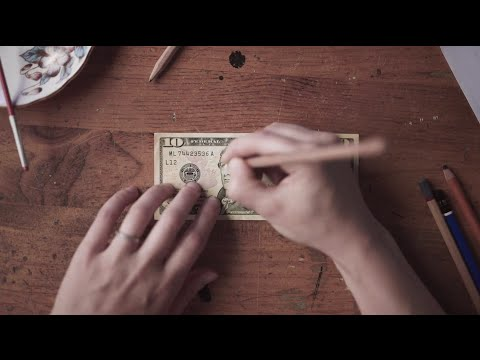

In [3]:
#The gender gap(non mandatory viewing)
from IPython.display import YouTubeVideo
YouTubeVideo("G_ikzQM93W8")

the Census data on income
http://www.census.gov/hhes/www/cpstables/032015/perinc/pinc03_000.htm

I posted the relevant data on the class webpage here : http://cosmo.nyu.edu/~fb55/PUI2016/data

# 1. Create two python dictionaries to store your data. 
```
     allmales = ... 
```
stores the male data
```
    allfemales = ...
```
stores the female data
     
each dictionary needs to have 5 key-pair values with keys:
'all', 'white', 'black', 'hispanic', 'asian'
each value should contain a dataframe read with the pandas read_excel function directly from the url. 

should contain



In [4]:
allmales = {}
allfemales = {}

In [15]:
url = "http://cosmo.nyu.edu/~fb55/PUI2016/data/"
male = 'pinc08_2'
female = 'pinc08_3'
alleth = '_1_1'
white =  '_1_4'
black = '_1_6'
asian = '_1_8'
hispanic = '_1_9'
excel = '.xls'


allmales['all']= pd.read_excel( url + male + alleth + excel, header = 9)
allmales['white']= pd.read_excel( url + male + white + excel, header = 9)
allmales['black']= pd.read_excel( url + male + black + excel, header = 9)
allmales['asian']= pd.read_excel( url + male + asian + excel, header = 9)
allmales['hispanic']= pd.read_excel( url + male + hispanic + excel, header = 9)
allfemales['all']= pd.read_excel( url + female + alleth + excel, header = 9)
allfemales['white']= pd.read_excel( url + female + white + excel, header = 9)
allfemales['black']= pd.read_excel( url + female + black + excel, header = 9)
allfemales['asian']= pd.read_excel( url + female + asian + excel, header = 9)
allfemales['hispanic']= pd.read_excel( url + female + hispanic + excel, header = 9)
allfemales['asian'].iloc[22][43]

u'(B)'

# the file name root is "pinc_" (common to all files)
## 08_2  are male, 
## 08_3 are female, 
### _1_1 is all ethnicities
### _1_4 is white
### _1_6 is black
### _1_8 is asian
### _1_9 is hispanic
# extension is .xls for all files
put together the link name from this info and load the data on your allmales and allfemales dictionaries

use 1 header row (figure out which one by looking at the output of my 
allfemales['all'].head() and .columns a couple of cells below)

In [16]:
#allfemales and allmales should be dictionaries
type(allfemales)

dict

In [7]:

len(allfemales['all'].columns)

49

In [8]:
# the files are a bit of a mess!
''''
allfemales['all'].columns = allfemales['all'].loc[8]

allmales['all'].columns = allmales['all'].loc[8]

allmales['white'].columns= allmales['white'].loc[8]
allmales['black'].columns= allmales['black'].loc[8]
allmales['asian'].columns= allmales['asian'].loc[8]
allmales['hispanic'].columns= allmales['hispanic'].loc[8]
allfemales['all'].columns = allfemales['all'].loc[8]
allfemales['white'].columns = allfemales['white'].loc[8]
allfemales['black'].columns = allfemales['black'].loc[8]
allfemales['asian'].columns = allfemales['asian'].loc[8]
allfemales['hispanic'].columns = allfemales['hispanic'].loc[8]

allmales['hispanic'].head(15)

''''

8,Characteristic,Total with Income,"$1 to $2,499 or loss","$2,500 to $4,999","$5,000 to $7,499","$7,500 to $9,999","$10,000 to $12,499","$12,500 to $14,999","$15,000 to $17,499","$17,500 to $19,999",...,"$92,500 to $94,999","$95,000 to $97,499","$97,500 to $99,999","$100,000 and over",Median income,nan,Mean income,nan,Gini ratio,nan
0,PINC-08. Source of Income in 2013- People 15 Y...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Data are based on the CPS ASEC sample of 68,00...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"For information on confidentiality protection,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Source: U.S. Census Bureau, Current Population...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,(Numbers in thousands. People 15 Years old and...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,15 Years and Over,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Hispanic (any race),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Characteristic,Total with Income,"$1 to $2,499 or loss","$2,500 to $4,999","$5,000 to $7,499","$7,500 to $9,999","$10,000 to $12,499","$12,500 to $14,999","$15,000 to $17,499","$17,500 to $19,999",...,"$92,500 to $94,999","$95,000 to $97,499","$97,500 to $99,999","$100,000 and over",Median income,NaN,Mean income,NaN,Gini ratio,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Value\n(Dol.),Standard\nerror (Dol.),Value\n(Dol.),Standard\nerror (Dol.),Ratio,Standard\nerror


In [9]:
''''
allfemales['all'].drop(allfemales['all'].index[0:9],inplace=True)
allmales['all'].drop(allmales['all'].index[0:9],inplace=True)
allfemales['white'].drop(allfemales['white'].index[0:9],inplace=True)
allmales['white'].drop(allmales['white'].index[0:9],inplace=True) 
allfemales['black'].drop(allfemales['black'].index[0:9],inplace=True)
allmales['black'].drop(allmales['black'].index[0:9],inplace=True)
allfemales['asian'].drop(allfemales['asian'].index[0:9],inplace=True)
allmales['asian'].drop(allmales['asian'].index[0:9],inplace=True)
allfemales['hispanic'].drop(allfemales['hispanic'].index[0:9],inplace=True)
allmales['hispanic'].drop(allmales['hispanic'].index[0:9],inplace=True)
allfemales['hispanic'].dropna(how='all', inplace=True ) 
''''

In [10]:
''''
allfemales['all'].dropna(how='all', inplace= True)
allmales['all'].dropna(how='all', inplace= True)
allfemales['white'].dropna(how='all', inplace= True)
allmales['white'].dropna(how='all', inplace= True)
allfemales['black'].dropna(how='all', inplace= True)
allmales['black'].dropna(how='all', inplace= True)
allfemales['asian'].dropna(how='all', inplace= True)
allmales['asian'].dropna(how='all', inplace= True)
allfemales['hispanic'].dropna(how='all', inplace= True)
allmales['hispanic'].dropna(how='all', inplace= True)
#allfemales['all'].dropna(how='all', inplace=True ) 
#str(allfemales['asian']['Median income'])
''''

SyntaxError: EOL while scanning string literal (<ipython-input-10-49c46ece061e>, line 14)

In [11]:
''''
#allfemales['asian'].replace( '(B)' , 0)
allfemales['all'].replace( u'(B)' , 0)

allmales['all'].replace( '(B)' , 0)
allfemales['white'].replace( '(B)' , 0)
allmales['white'].replace( '(B)' , 0)
allfemales['black'].replace( '(B)' , 0)
allmales['black'].replace( '(B)' , 0)
allfemales['asian'].replace( '(B)' , 0)
allmales['asian'].replace( '(B)' , 0)
allfemales['hispanic'].replace( '(B)' , 0)
allmales['hispanic'].replace( '(B)' , 0)
#allfemales['asian']['Median income'][14]
''''


8,Characteristic,Total with Income,"$1 to $2,499 or loss","$2,500 to $4,999","$5,000 to $7,499","$7,500 to $9,999","$10,000 to $12,499","$12,500 to $14,999","$15,000 to $17,499","$17,500 to $19,999",...,"$92,500 to $94,999","$95,000 to $97,499","$97,500 to $99,999","$100,000 and over",Median income,nan,Mean income,nan,Gini ratio,nan
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Value\n(Dol.),Standard\nerror (Dol.),Value\n(Dol.),Standard\nerror (Dol.),Ratio,Standard\nerror
10,....Total,16484.0,605.0,472.0,714.0,810.0,958.0,640.0,1115.0,761.0,...,37.0,61.0,36.0,671.0,25411,288,34176,492,0.454,0.006
11,Earnings,14104.0,439.0,354.0,542.0,482.0,712.0,402.0,955.0,617.0,...,14.0,52.0,26.0,607.0,26914,281,35729,543,0.437,0.0066
12,..Wages and Salary,13271.0,401.0,341.0,512.0,425.0,677.0,371.0,871.0,600.0,...,13.0,48.0,25.0,551.0,27017,294,35627,512,0.432,0.0061
13,..Nonfarm Self-Employment,1047.0,173.0,26.0,48.0,54.0,82.0,35.0,88.0,18.0,...,0.0,4.0,0.0,47.0,19988,2228,29197,2647,0.574,0.0292
14,..Farm Self-Employment,108.0,76.0,1.0,5.0,0.0,14.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,1781,175,5021,1554,0.806,0.0539
15,Social Security,1549.0,51.0,81.0,104.0,214.0,232.0,269.0,241.0,139.0,...,0.0,0.0,0.0,0.0,13366,279,13767,282,0.265,0.0087
16,SSI (Supplemental Security Income),452.0,53.0,65.0,110.0,159.0,21.0,18.0,13.0,5.0,...,0.0,0.0,0.0,0.0,7422,335,7481,300,0.287,0.0185
17,Public Assistance,96.0,54.0,32.0,5.0,0.0,2.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2230,361,2996,675,0.563,0.069
18,Veterans Benefits,191.0,30.0,22.0,8.0,12.0,28.0,11.0,10.0,11.0,...,0.0,0.0,0.0,0.0,12140,1276,16566,1589,0.472,0.0266


In [17]:
#the rel values in the Median income row are fewer than the number of rows
print (allfemales['hispanic'].shape)
allfemales['hispanic'].applymap(np.isreal).sum()

(49, 49)


Characteristic           1
Total with Income       49
$1 to $2,499 or loss    49
$2,500 to $4,999        49
$5,000 to $7,499        49
$7,500 to $9,999        49
$10,000 to $12,499      49
$12,500 to $14,999      49
$15,000 to $17,499      49
$17,500 to $19,999      49
$20,000 to $22,499      49
$22,500 to $24,999      49
$25,000 to $27,499      49
$27,500 to $29,999      49
$30,000 to $32,499      49
$32,500 to $34,999      49
$35,000 to $37,499      49
$37,500 to $39,999      49
$40,000 to $42,499      49
$42,500 to $44,999      49
$45,000 to $47,499      49
$47,500 to $49,999      49
$50,000 to $52,499      49
$52,500 to $54,999      49
$55,000 to $57,499      49
$57,500 to $59,999      49
$60,000 to $62,499      49
$62,500 to $64,999      49
$65,000 to $67,499      49
$67,500 to $69,999      49
$70,000 to $72,499      49
$72,500 to $74,999      49
$75,000 to $77,499      49
$77,500 to $79,999      49
$80,000 to $82,499      49
$82,500 to $84,999      49
$85,000 to $87,499      49
$

In [19]:
# there are a lot of non-real values that make the analysis hard.
# the ugly loops below will help you clean up 
# CHALLENGE: can you do better and to it in a more pythonic way 
#            without using loops? 
#NOTE: this only will work if the data is store how I suggested. 
# you are welcome to find your own solution though.

for gender in [allmales, allfemales]:
    for k in gender:
        # find non real values in the dataframe with applymap
        isreal  = gender[k].applymap(np.isreal)
        for c in gender[k].columns : 
            #i f some but not all values in column are real
            #replace the non real ones
            if isreal.sum()[c] > 0 and \
            isreal.sum()[c] < gender[k].shape[0]:
                gender[k][c][~isreal[c]] =  np.nan
                gender[k][c] = gender[k][c].astype(float)


# now you can plot the dataframe values with a scatter plot 
 just like I tried to do above
 please plot is and write a DESCRIPTIVE caption for the plot in a cell below it

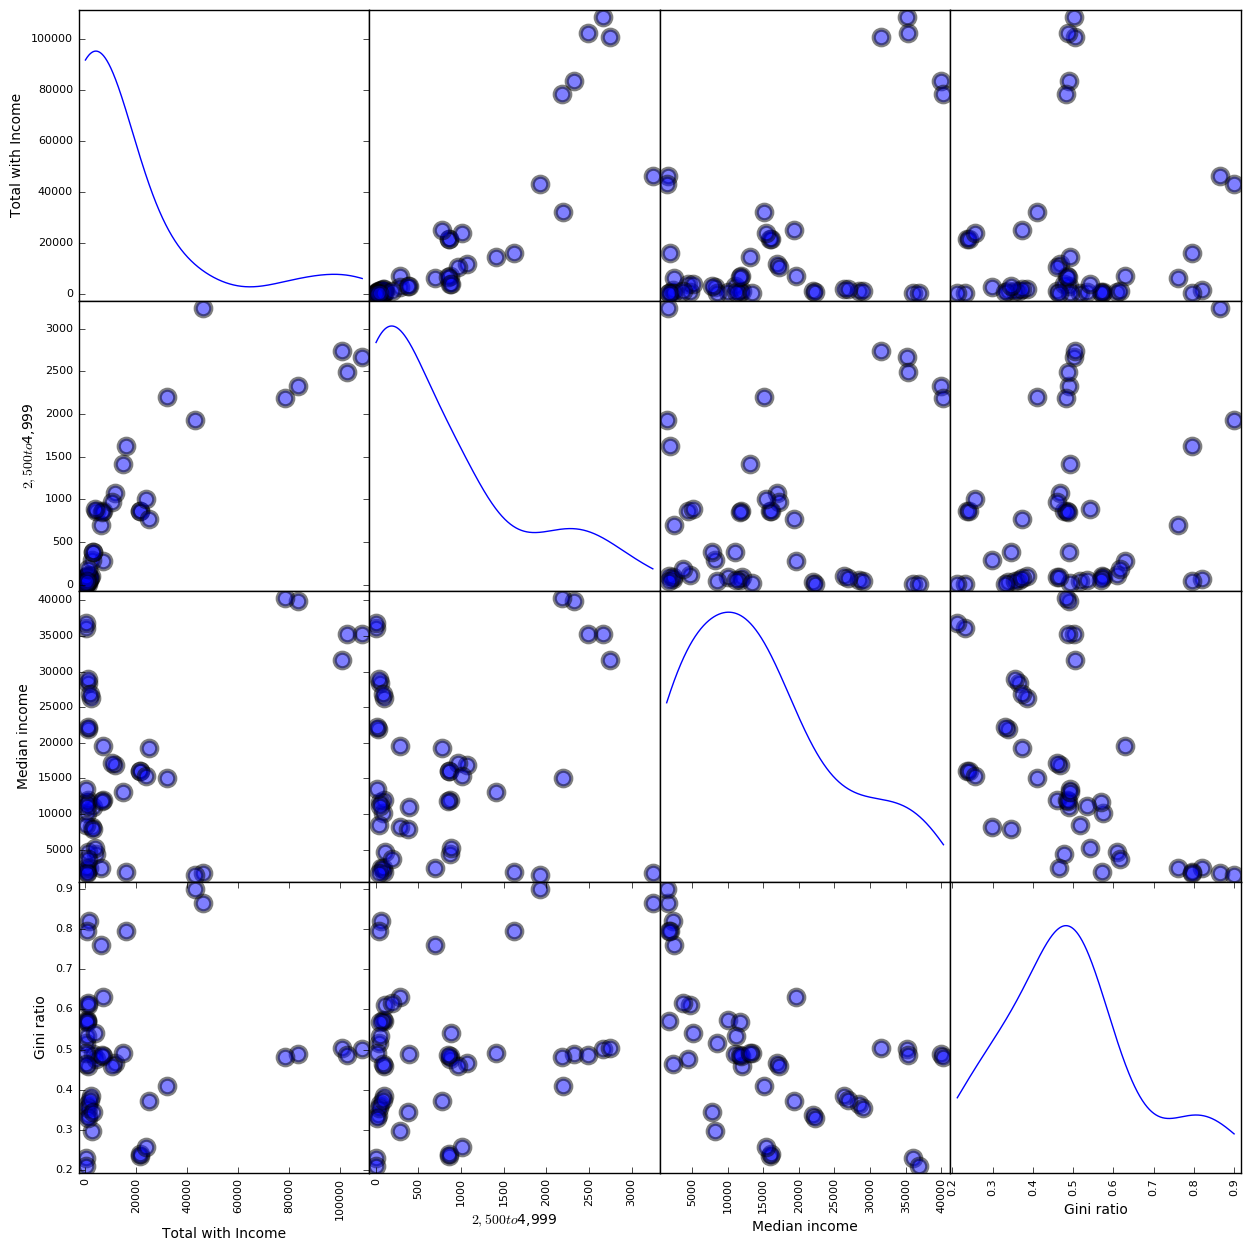

In [23]:
# use scatter_matrix to make this plot... 
fig = pd.scatter_matrix(allmales['all']
                   [[u'Total with Income',u'$2,500 to $4,999',
                     u'Median income',u'Gini ratio']],
                   linewidth= 3, s=500, figsize=(15,15), 
                        diagonal='kde') 

# FBB missing figure caption


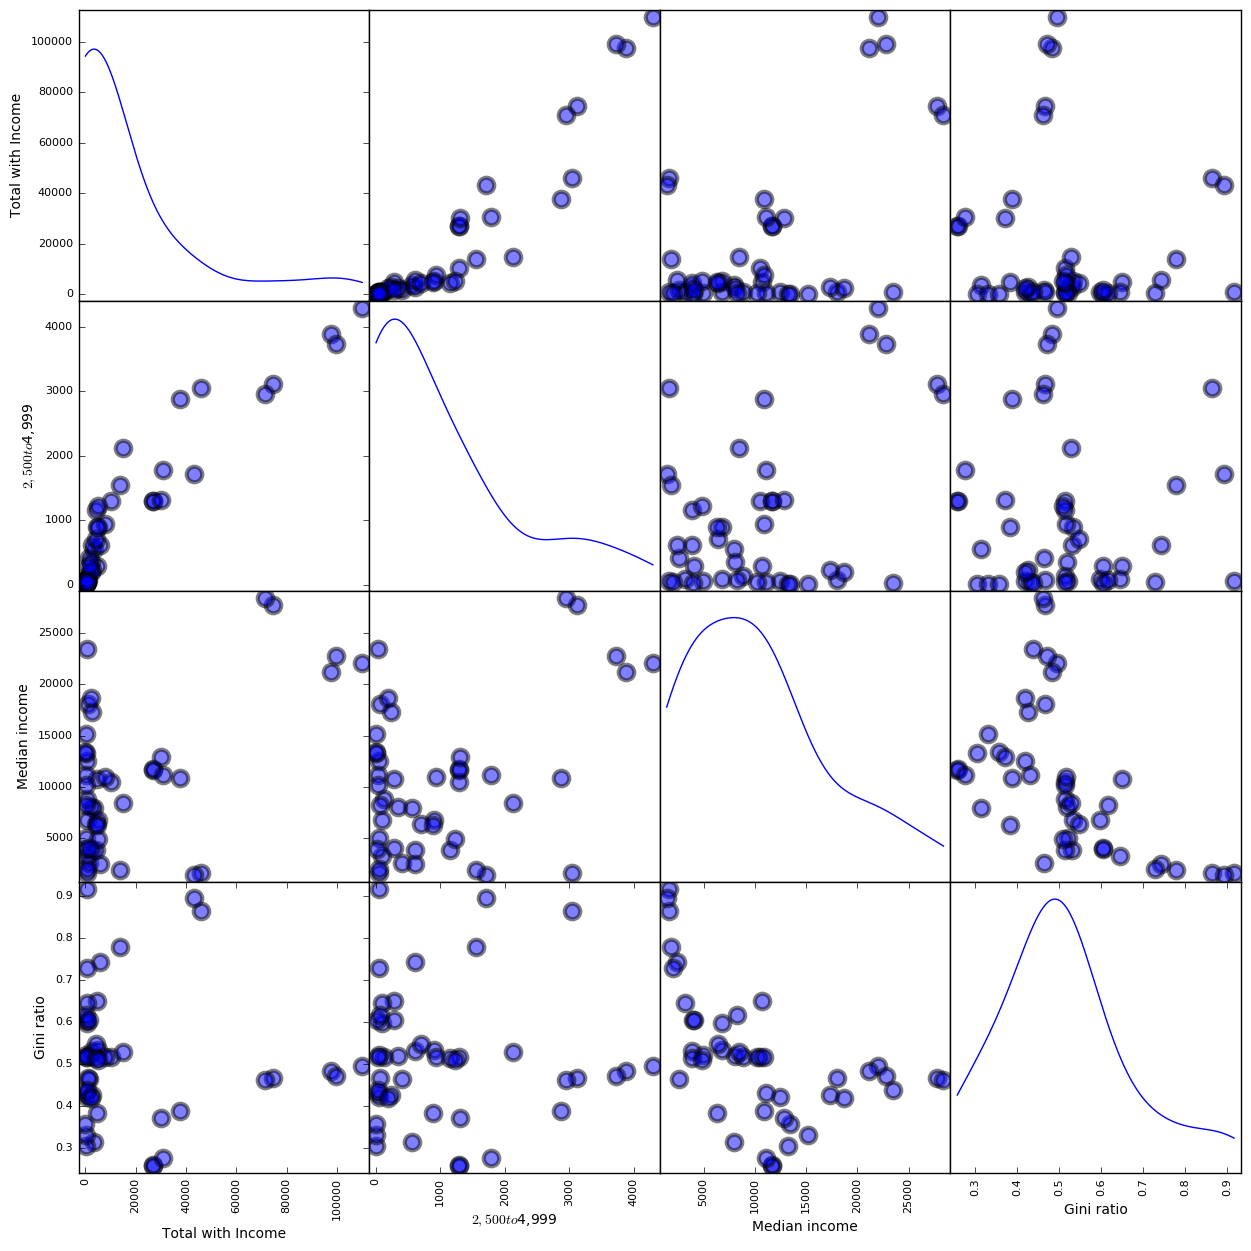

In [25]:
# do the same for all female
fig = pd.scatter_matrix(allfemales['all']
                   [[u'Total with Income',u'$2,500 to $4,999',
                     u'Median income',u'Gini ratio']],
                   linewidth= 3, s=500, figsize=(15,15), 
                        diagonal='kde') 

# FBB missing figure caption

## 3. to see how the male and female income relate to each other plot the Total Median Income (from any source of revenue) of females vs the Total Median Income of males, race by race (one data point per race)

## also plot the 1-1 line: the diagonal that corresponds to men and women getting the same pay

(make the plot and describe it in a "caption" in the cell below the plot)

In [28]:
import matplotlib.pyplot as pl

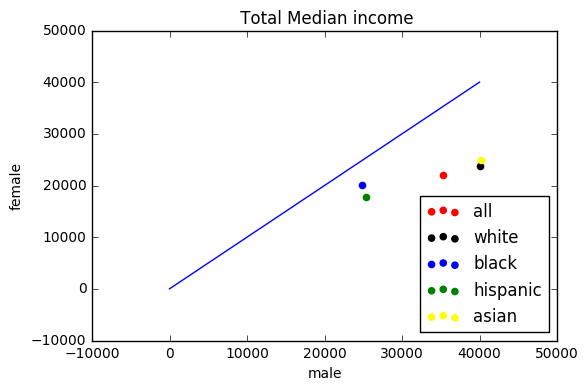

In [63]:
x= ([0,40000])
pl.scatter(allmales['all']['Median income'][1], allfemales['all']['Median income'][1], color = 'red', label = 'all')
pl.scatter(allmales['white']['Median income'][1], allfemales['white']['Median income'][1], color = 'black', label = 'white')
pl.scatter(allmales['black']['Median income'][1], allfemales['black']['Median income'][1], color = 'blue', label = 'black')
pl.scatter(allmales['hispanic']['Median income'][1], allfemales['hispanic']['Median income'][1], color = 'green', label = 'hispanic')
pl.scatter(allmales['asian']['Median income'][1], allfemales['asian']['Median income'][1], color = 'yellow', label = 'asian')
pl.plot(x, x)
pl.title(" Total Median Income")
pl.xlabel("male")
pl.ylabel("female")
pylab.legend(loc='lower right')
pl.show()

# FBB missing figure caption
# what am I looking at?? what does it mean???

# 4. Now fit the data with a line.
### you can use statsmodels, or scipy, numpy, or create your own residual minimization function. 
### Below are steps on how to do this with numpy. Statsmodels requires fewer steps, and you are welcome to use that package. Numpy is less of a black box, so you would learn more taking yourself through the exercise. but you will be graded on the succesful fit, however you choose to perform it.

Steps to use numpy (and you do not have to!) you can for example use 

pl.plot(newx, np.poly1d(np.ployfit(x, y, 1))(newx)

to make and plot the fit in one line (although this way you did not save the parameters so you need to rerun the function to get the slope and intercept ... :-/

why not challenge yourself (if you want) and  create your own residual minimization function you can minimize it with scipy instead of a nested for loop (which is called 'brute force minimization')!

from scipy.optimize import minimize

def line ().....
    #this would be a function that creates a line given parameters, 
    #like we did in class
    ...
    return y

def residuals(data, model, error=None):
    #you can add errors if you want
    you want to return the sum of the residuals 
    #(difference b/w data and model **2)
    return residuals

You need an initial guess for the parameters, where you start searching. It has to be a single variable, so for 2 parameters (a and b for a line) you need to make make a list (or array or tuple) of 2 elements. The numbers inside do not have to be 0 and 1 like I have below - but choose something not too crazy or your minimization will get lost!

p0 = [0,1] 

then run: 

result = minimize(residuals, p0, args=(all_males, all_females))

in args I put all arguments of the function residuals that are not to be evaluated for the minimization (in this case the data)

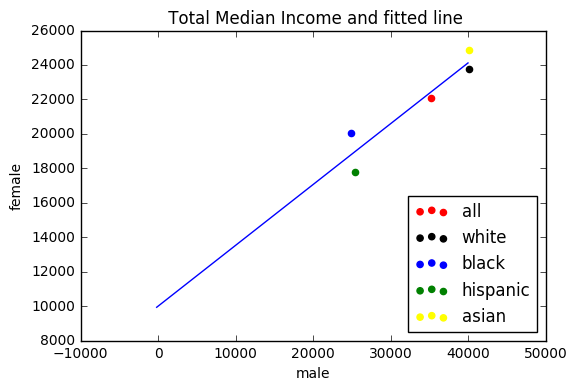

In [115]:
males = [allmales['all']['Median income'][1], allmales['white']['Median income'][1], allmales['hispanic']['Median income'][1],\
         allmales['black']['Median income'][1], allmales['asian']['Median income'][1]]

females = [allfemales['all']['Median income'][1], allfemales['white']['Median income'][1], allfemales['hispanic']['Median income'][1],\
         allfemales['black']['Median income'][1], allfemales['asian']['Median income'][1]]

param=np.polyfit(males,females, 1 )
x= np.array([-170,40000])
y = param[0]*x+param[1]
pl.scatter(allmales['all']['Median income'][1], allfemales['all']['Median income'][1], color = 'red', label = 'all')
pl.scatter(allmales['white']['Median income'][1], allfemales['white']['Median income'][1], color = 'black', label = 'white')
pl.scatter(allmales['black']['Median income'][1], allfemales['black']['Median income'][1], color = 'blue', label = 'black')
pl.scatter(allmales['hispanic']['Median income'][1], allfemales['hispanic']['Median income'][1], color = 'green', label = 'hispanic')
pl.scatter(allmales['asian']['Median income'][1], allfemales['asian']['Median income'][1], color = 'yellow', label = 'asian')
pl.title(" Total Median Income and fitted line")
pl.xlabel("male")
pl.ylabel("female")
pylab.legend(loc='lower right')


pl.plot(x, y)
#pl.show()

# FBB what am I looking at?? what does it mean???

## there is an analytical solution for the OLS (ordinary least square) regression which is coded below. please try to read the code and understand the formula! 


In [116]:
#this is the analytical best regression line. 
# it can be proved (ask me about it if you want!)
# run the cell below to get the beta0 and beta1 values
from scipy import stats
all_males=np.array([0., allmales['all']['Median income'][1],
                    allmales['white']['Median income'][1],
                    allmales['black']['Median income'][1],
                     allmales['hispanic']['Median income'][1],
                    allmales['asian']['Median income'][1]])

all_females=np.array([0.] + [allfemales[k]['Median income'][1] \
                             for k in ['all', 'white', 'black',
                                     'hispanic','asian']])
cor = stats.spearmanr(all_males, all_females)
beta1 = cor[0] * all_females.std() / all_males.std()
beta0 = all_females.mean() - beta1 * all_males.mean()
beta0, beta1

(2224.3609760454674, 0.57394829035421091)

## remake the scatter plot, with your line fit as well as the analytical solution to compare that with the result of your numerical one (remember: a line is y = beta0 + beta1 * x)

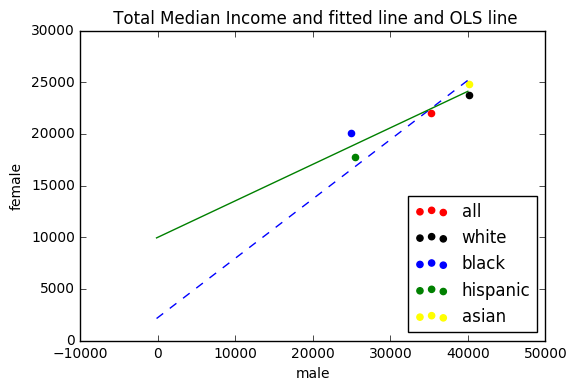

In [117]:
#...
yOLS= beta1*x+beta0
pl.scatter(allmales['all']['Median income'][1], allfemales['all']['Median income'][1], color = 'red', label = 'all')
pl.scatter(allmales['white']['Median income'][1], allfemales['white']['Median income'][1], color = 'black', label = 'white')
pl.scatter(allmales['black']['Median income'][1], allfemales['black']['Median income'][1], color = 'blue', label = 'black')
pl.scatter(allmales['hispanic']['Median income'][1], allfemales['hispanic']['Median income'][1], color = 'green', label = 'hispanic')
pl.scatter(allmales['asian']['Median income'][1], allfemales['asian']['Median income'][1], color = 'yellow', label = 'asian')
pl.title(" Total Median Income and fitted line and OLS line")
pl.xlabel("male")
pl.ylabel("female")
pylab.legend(loc='lower right')

pl.plot(x, yOLS,'--', label = 'OLS')
pl.plot(x, y, label = 'mine')


# FBB missing figure caption

# FBB what am I looking at?? what does it mean???

# 5. this was done with THE TOTAL MEDIAN INCOME, let's now see if all forms of income lead to a different fit. 

We only did this for the Total Median Income, but the file contained income from many sources, which were stored in the Characteristics column.
Use one data point for each source of income (each Characteristics) choosing the 'Median income' for that source and fit a line to those data. The line fit should similar then the previous fit if the Total median income was representative for all forms of income included in this analysis.

To unravel the data and concatenate them back together in a single array is a little complex; 
here are a few lines of code that should do the trick ( this is just what I came up with. If you have something better please share!!)

I used np.concatenate to put together arrays (it takes a list of arrays) and np.flatten to make the array 1 dimensional after merging. I also want to maske the nan values (many functions do not deal well with them). I do that "broadcasting":  using an array of Bools indeces to select the non nan values. Where the array of Bools is True the value is selected, where it is False it is not: e.g.

In [134]: a = np.arange(5)

In [135]: abol = a>2

In [136]: abol
Out[136]: array([False, False, False,  True,  True], dtype=bool)

In [137]: a[abol]
Out[137]: array([3, 4])

In [119]:
all_males_allincomes = np.array(
    np.concatenate([allmales['all']['Median income'][:].values,
                    allmales['white']['Median income'][:].values,
                    allmales['black']['Median income'][:].values,
                    allmales['hispanic']['Median income'][:].values,
                    allmales['asian']['Median income'][:].values]).flatten())
#with a list comprehension syntax, but the result i the same as above
all_females_allincomes = np.array(
    np.concatenate([allfemales[k]['Median income'][:].values \
                    for k in ['all',
                                   'white', 'black', 
                                    'hispanic', 'asian']]).flatten())

#IDepending on what you use to fit you may need to remove NaN values 
#I am gonna create the mask in the next line. 
#the mask is False where either male or female value is NaN. 
#Notice that True is really just >1, and False really 0. 
#so i can add the male and female mask and the resulting mask will be 
#False where both arrays are not Nan, and true otherwise. 

mask = ~(np.isnan(all_males_allincomes) + np.isnan(all_females_allincomes))
# now you can use mask as an index (broadcasting) to select the non NaN values

In [130]:
all_females_allincomes[True]

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:1: VisibleDeprecationWarning: using a boolean instead of an integer will result in an error in the future
  if __name__ == '__main__':


22063.0

In [133]:
all_males_allincomes[mask].size

178

In [177]:
cormask= stats.spearmanr(all_males_allincomes[mask], all_females_allincomes[mask])
beta1allincome = cormask[0] * all_females_allincomes[mask].std() / all_males_allincomes[mask].std()
beta0allincome = all_females_allincomes[mask].mean() - beta1allincome * all_males_allincomes[mask].mean()
beta1allincome.size 
#beta1allincome


1

In [178]:
'''
cor = stats.spearmanr(all_males, all_females)
beta1 = cor[0] * all_females.std() / all_males.std()
beta0 = all_females.mean() - beta1 * all_males.mean()
beta0, beta1
'''



SyntaxError: EOL while scanning string literal (<ipython-input-178-d000d55cb67f>, line 6)

In [193]:
import matplotlib

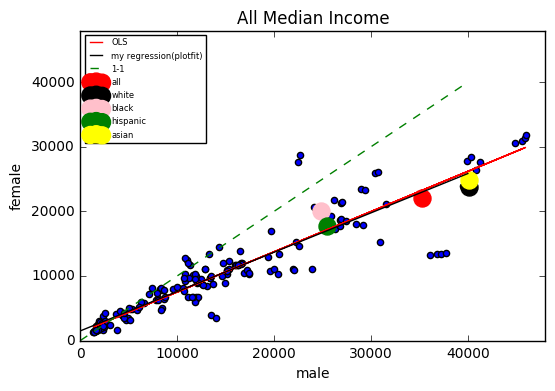

slope: for OLS is 0.62234483904 for Polyfit is 0.609020523617


In [216]:
#OLS
yOLS_allincome= beta0allincome + beta1allincome*all_males_allincomes[mask]

pl.plot(all_males_allincomes[mask], yOLS_allincome, c = 'red', label = 'OLS')
#pl.plot(all_males_allincomes[mask], yOLS_allincome,'--', label = 'OLS')


#OUR FITTED LINE


param1=np.polyfit(all_males_allincomes[mask],all_females_allincomes[mask], 1 )
x1= np.array([0,40000])
y_fitted = param1[0]*x1+param1[1]
pl.plot(x1, y_fitted, c = 'black', label = 'my regression(plotfit)')


#Total median income
pl.scatter(allmales['all']['Median income'], allfemales['all']['Median income'], label = '')
pl.scatter(allmales['white']['Median income'], allfemales['white']['Median income'], label = '')
pl.scatter(allmales['black']['Median income'], allfemales['black']['Median income'], label = '')
pl.scatter(allmales['hispanic']['Median income'], allfemales['hispanic']['Median income'], label = '')
pl.scatter(allmales['asian']['Median income'], allfemales['asian']['Median income'], label = '')


#all median income
pl.scatter(allmales['all']['Median income'][1], allfemales['all']['Median income'][1], color = 'red', label = 'all', s = 150)
pl.scatter(allmales['white']['Median income'][1], allfemales['white']['Median income'][1], color = 'black', label = 'white', s = 150 )
pl.scatter(allmales['black']['Median income'][1], allfemales['black']['Median income'][1], color = 'pink', label = 'black',s = 150 )
pl.scatter(allmales['hispanic']['Median income'][1], allfemales['hispanic']['Median income'][1], color = 'green', label = 'hispanic',s = 150 )
pl.scatter(allmales['asian']['Median income'][1], allfemales['asian']['Median income'][1], color = 'yellow', label = 'asian', s = 150 )

#1-1 line

pl.plot(x, x, '--', c= 'green', label = '1-1')
pl.title("All Median Income")
pl.xlabel("male")
pl.ylabel("female")


pylab.legend(loc='upper left', prop={'size':6})
pl.xlim(0, 48000)
pl.ylim(0, 48000)
figure(figsize = [7,7])
pl.show()
# fit and plot...
print ('slope: for OLS is', beta1allincome, 'for Polyfit is', param1[0])
# is the line fit similar to the one with only the median income? 
# can you find any high legverage points?

### CAPTION: ...
# FBB CAPTION!!

In [ ]:
##this was my final plot. yours do not have to look like this, 
# this is just an example for your convenience.

# 6. PREDICTION


## Now pick a stipend (maybe your ideal stipend).
## and predict what a woman in a position where a man recieves your ideal stipend would make



In [191]:
xstipend = 200000
ypredict= beta1allincome*xstipend+beta0allincome
print( 'If a man salary be $200,000, a woman in a same position will get:', ypredict)

If a man salary be $200,000, a woman in a same position will get: 125762.731857


# 7. lastly do you have any comments about what these data tell us about race? 
how you would go about analyzing race differences with these data? (just a few sentences)

With in black people females salary is more than men, in Hispanic it's almost the same but for the rest men get more.

# FBB no its not! all incomes are less for women than man, look at tyour figure with the x=y line.
# FBB  that is true, but ethnicity is covariant with income, which  invalidate the first part of the analysis and may invalidate the second the analysis (see my solution)
